In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
left = cv2.imread("left.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread("right.png", cv2.IMREAD_GRAYSCALE)

array([[ 88,  85,  83, ..., 158, 166, 172],
       [ 76,  76,  83, ..., 171, 174, 169],
       [110,  98,  81, ..., 176, 169, 170],
       ...,
       [143, 146, 151, ..., 128, 134, 137],
       [153, 140, 136, ..., 132, 143, 167],
       [150, 142, 134, ..., 179, 164, 172]], dtype=uint8)
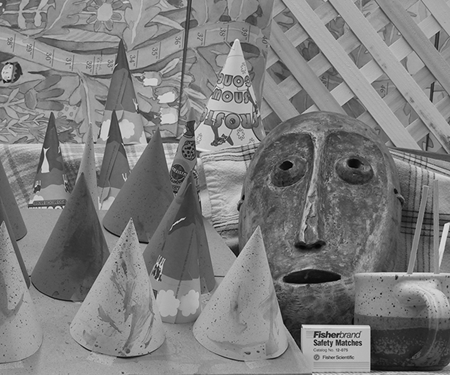

In [ ]:
left

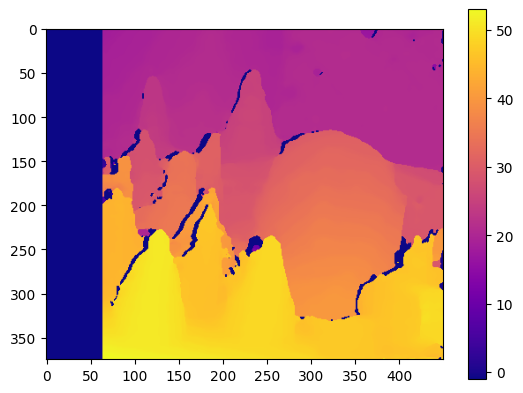

In [ ]:
stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=64,
    blockSize=9,
    P1=8 * 3 * 9**2,
    P2=32 * 3 * 9**2
)
disparity = stereo.compute(left, right).astype(np.float32) / 16.0
plt.imshow(disparity, 'plasma')
plt.colorbar()
plt.show()

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


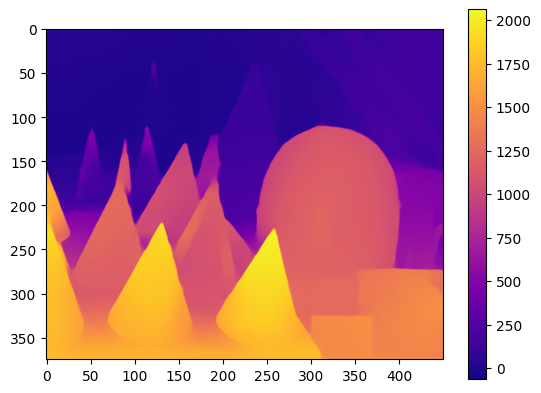

In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt

model_type = "DPT_Hybrid"
model = torch.hub.load("intel-isl/MiDaS", model_type, trust_repo=True)
model.eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms", trust_repo=True)
transform = midas_transforms.dpt_transform if model_type in ["DPT_Large", "DPT_Hybrid"] else midas_transforms.small_transform

img = cv2.imread("left.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img)
if isinstance(input_batch, tuple):
    input_batch = input_batch[0]

with torch.no_grad():
    prediction = model(input_batch)
    prediction = torch.nn.functional.interpolate(prediction.unsqueeze(1), size=img.shape[:2], mode="bicubic", align_corners=False).squeeze()

depth = prediction.cpu().numpy()

plt.imshow(depth, cmap="plasma")
plt.colorbar()
plt.show()
